# Task 1

Task 1 Dataset Shape: (178, 13)


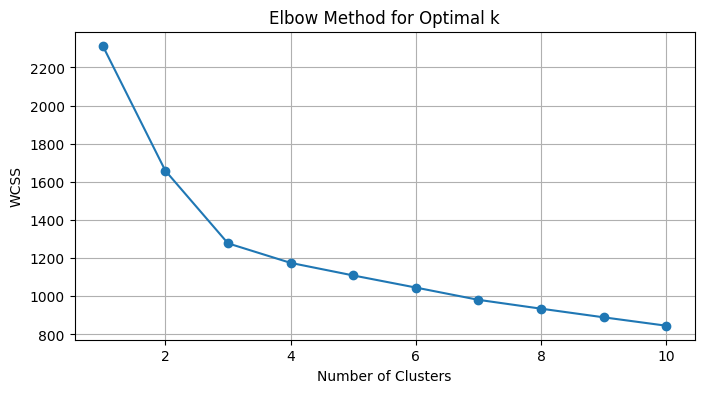


K-Means applied with k=3. Cluster counts:
Cluster
0    65
2    62
1    51
Name: count, dtype: int64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore')

# 1. Load Dataset (Using Wine dataset as a proxy for "downloaded" clustering dataset)
data = load_wine()
df_task1 = pd.DataFrame(data.data, columns=data.feature_names)
print("Task 1 Dataset Shape:", df_task1.shape)

# 2. Determine optimum number of clusters using Elbow Curve
wcss = []
K_range = range(1, 11)

# Standardize for better clustering
scaler = StandardScaler()
df_task1_scaled = scaler.fit_transform(df_task1)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_task1_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 3. Apply K-Means with chosen k (e.g., k=3 based on Wine dataset knowledge/elbow)
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(df_task1_scaled)

# Add clusters to dataframe
df_task1['Cluster'] = clusters
print(f"\nK-Means applied with k={optimal_k}. Cluster counts:")
print(df_task1['Cluster'].value_counts())

# Task 2

Loading Online Retail.xlsx (this may take a moment)...
Dataset Loaded Successfully. Shape: (541909, 8)

Aggregated Customer Data:
   CustomerID  TotalAmount  NumItems
0     12346.0         0.00         0
1     12347.0      4310.00      2458
2     12348.0      1797.24      2341
3     12349.0      1757.55       631
4     12350.0       334.40       197


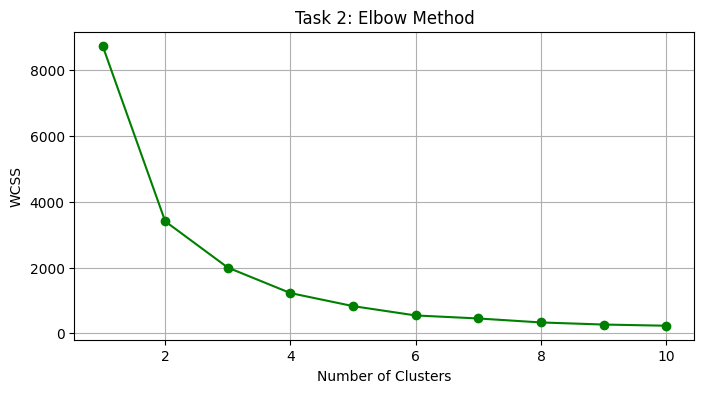

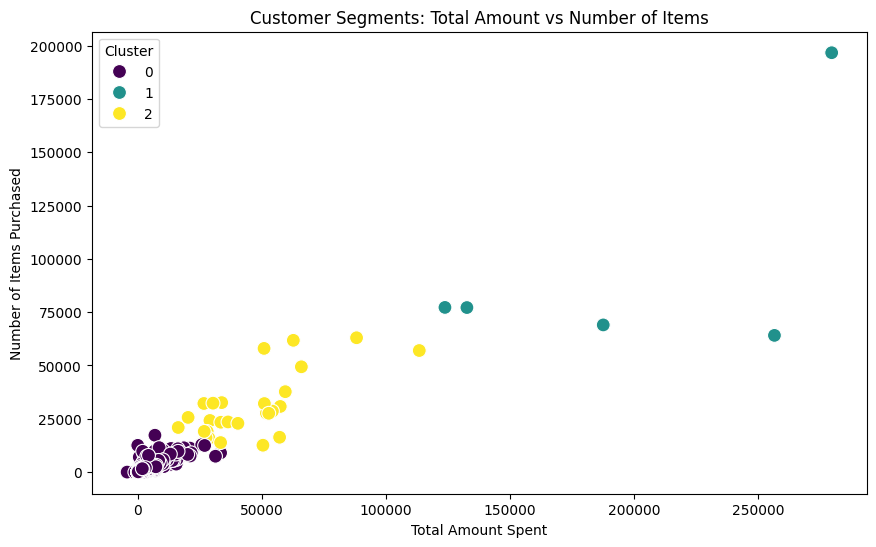


Cluster Analysis:
           TotalAmount      NumItems
Cluster                             
0          1404.271218    829.108756
1        195941.550000  96858.400000
2         45400.777037  30528.296296


In [2]:
# Load Online Retail Data
try:
    print("Loading Online Retail.xlsx (this may take a moment)...")
    # Reading excel, might take time due to file size
    retail_df = pd.read_excel('Online Retail.xlsx')
    print("Dataset Loaded Successfully. Shape:", retail_df.shape)
except FileNotFoundError:
    print("Error: 'Online Retail.xlsx' not found. Generating dummy data.")
    # Dummy data generation if file missing
    retail_df = pd.DataFrame({
        'CustomerID': np.random.randint(1000, 1100, 1000),
        'Quantity': np.random.randint(1, 10, 1000),
        'UnitPrice': np.random.uniform(10, 100, 1000)
    })

# Data Preprocessing
# Remove rows with missing CustomerID
retail_df = retail_df.dropna(subset=['CustomerID'])

# Calculate Total Amount Spent per transaction
retail_df['TotalAmount'] = retail_df['Quantity'] * retail_df['UnitPrice']

# Aggregate data by CustomerID
customer_df = retail_df.groupby('CustomerID').agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum'  # Number of items purchased
}).reset_index()

customer_df.rename(columns={'Quantity': 'NumItems'}, inplace=True)
print("\nAggregated Customer Data:")
print(customer_df.head())

# Select relevant features
features = ['TotalAmount', 'NumItems']
X_task2 = customer_df[features]

# Standardize
scaler_t2 = StandardScaler()
X_task2_scaled = scaler_t2.fit_transform(X_task2)

# Elbow Method for Task 2
wcss_t2 = []
K_range_t2 = range(1, 11)

for k in K_range_t2:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_task2_scaled)
    wcss_t2.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range_t2, wcss_t2, marker='o', color='green')
plt.title('Task 2: Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Apply K-Means (Choosing k=3 or 4 based on typical retail segments)
k_task2 = 3
kmeans_task2 = KMeans(n_clusters=k_task2, random_state=42, n_init=10)
customer_df['Cluster'] = kmeans_task2.fit_predict(X_task2_scaled)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_df, x='TotalAmount', y='NumItems', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments: Total Amount vs Number of Items')
plt.xlabel('Total Amount Spent')
plt.ylabel('Number of Items Purchased')
plt.show()

# Insights
print("\nCluster Analysis:")
print(customer_df.groupby('Cluster')[['TotalAmount', 'NumItems']].mean())

# Task 3

In [3]:
# Load Financial Data
try:
    financial_df = pd.read_csv('Financials.csv')
    print("Financial Data Loaded. Shape:", financial_df.shape)
    
    # Clean column names (strip whitespace)
    financial_df.columns = financial_df.columns.str.strip()
    print("Columns:", financial_df.columns.tolist())
    
    # Preprocessing: Remove non-numeric characters from financial columns if necessary
    # (e.g., '$', ',', brackets). Assuming columns might need cleaning.
    cols_to_clean = ['Sales', 'COGS', 'Profit', 'Gross Sales', 'Manufacturing Price', 'Sale Price']
    for col in cols_to_clean:
        if col in financial_df.columns and financial_df[col].dtype == 'object':
            financial_df[col] = financial_df[col].replace({'\$': '', ',': '', '\(': '-', '\)': ''}, regex=True)
            financial_df[col] = pd.to_numeric(financial_df[col])
            
    # Select relevant numeric features for PCA
    # Using available financial metrics
    features_pca = ['Sales', 'COGS', 'Profit', 'Gross Sales', 'Units Sold']
    # Filter only existing columns
    features_pca = [c for c in features_pca if c in financial_df.columns]
    
    X_pca = financial_df[features_pca].dropna()
    print("\nFeatures selected for PCA:", features_pca)
    
except FileNotFoundError:
    print("Error: 'Financials.csv' not found. Using dummy data.")
    X_pca = pd.DataFrame(np.random.rand(100, 5), columns=['Income', 'Spending', 'Savings', 'Investments', 'Debt'])

# Standardize
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(X_pca_scaled)

# Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\nExplained Variance Ratio per Component:", explained_variance)
print("Cumulative Variance:", cumulative_variance)

# Determine number of components to retain (e.g., > 90% variance)
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nNumber of components to retain for 90% variance: {n_components}")

# Transform with selected components
pca_final = PCA(n_components=n_components)
X_reduced = pca_final.fit_transform(X_pca_scaled)
print(f"Reduced Data Shape: {X_reduced.shape}")

# Visualize Explained Variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('PCA Explained Variance')
plt.show()

# Insights
print("\nPCA Analysis:")
print(f"First Principal Component explains {explained_variance[0]*100:.2f}% of the variance.")
print("This component likely captures the primary magnitude of financial activity (e.g., overall volume of sales/profit).")

Financial Data Loaded. Shape: (700, 16)
Columns: ['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name', 'Year']


ValueError: Unable to parse string " -   " at position 187